# Summing over certain Axis

Summation of a multi-dimensional array can occur over multiple axis. For example,

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.arange(20).reshape(4, 5)
print(A)
print('Over axis=0', np.sum(A, axis=0))
print('Over axis=1', np.sum(A, axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
Over axis=0 [30 34 38 42 46]
Over axis=1 [10 35 60 85]


Notice the difference in output shape for the two summations.

**Problem:** Figure out how `np.sum` works over different axis. Try playing with different sized arrays. Like try summing `np.arange(3*4*5).reshape(3, 4, 5)` over different axis. Then implement your own version of the summation. Write test cases to verify it works

In [18]:
def my_sum(x, axis):
    # Works with axis=0 or axis=1 but otherwise fails
    final = []
    if(axis == 1):
        for j in range(x.shape[0]):
            temp = 0
            for i in range(x.shape[1]):
                # Go through each number downwards
                temp = temp + x[j, i]
            final.append(temp)
    elif(axis == 0):
        for j in range(x.shape[1]):
            temp = 0;
            for i in range(x.shape[0]):
                temp = temp + x[i, j]
            final.append(temp)
    print(final)
    return final
# Add test cases
my_sum(A, axis=1)
my_sum(A, axis=0)
B = np.arange(66).reshape(33, 2)
my_sum(B, axis=0)
my_sum(B, axis=1)

[10, 35, 60, 85]
[30, 34, 38, 42, 46]
[1056, 1089]
[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129]


[1,
 5,
 9,
 13,
 17,
 21,
 25,
 29,
 33,
 37,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101,
 105,
 109,
 113,
 117,
 121,
 125,
 129]

# Cumulative Summation

Sometimes, it is important to get a running total of something. This can be done with [`np.cumsum`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.cumsum.html),

In [4]:
print(np.arange(10))
print(np.cumsum(np.arange(10)))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  3  6 10 15 21 28 36 45]


**Problem:** Figure out how cumsum works and write your own implementation with test cases.

In [22]:
def my_cumsum(x):
    antwort = []
    num = 0
    for i in range(x.shape[0]):
        num = num + x[i]
        antwort.append(num)
    print(antwort)
    return antwort
# Add test cases
my_cumsum(np.arange(11))
my_cumsum(np.arange(5))

[0, 1, 3, 6, 10, 15, 21, 28, 36, 45, 55]
[0, 1, 3, 6, 10]


[0, 1, 3, 6, 10]

# Discrete Integration

Scary word for cumulative summation. Let's look at an application.

**Problem:** Imagine we are looking at the output of a predictive system that forecasts Amazon sales for a particular item per day. We have a certain number of items in our various fulfillment centers called `quantity` and we would like to know when we are likely to run out of items due to sales. Use `np.sum` and `np.cumsum` to figure out when all the fulfillment centers will run out of items.

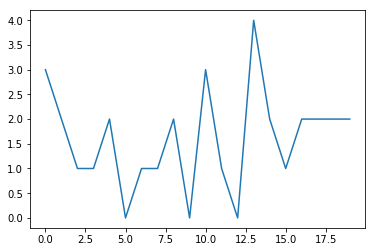

In [33]:
quantity = np.array([10, 14, 23, 8])
predicted_sales = np.random.randint(low=0, high=5, size=20)
plt.plot(predicted_sales)
plt.show()

In [34]:
# Find out when we run out of items
total = np.cumsum(quantity)
print(total)
totalnum = total[total.shape[0]-1]
# Use totalnum and subtract the quantity each day until totalnum < quantity, that is when the fulfillment center runs out
for i in range(predicted_sales.shape[0]):
    # Subtract if there are enough items
    if(totalnum > predicted_sales[i-1]):
        totalnum = totalnum - predicted_sales[i - 1]
        print("Day: ")
        print(i + 1)
        print("Amount left: ")
        print(totalnum)
        print(" ")
    else:
        print("")
        print("You ran out on day: ")
        print(i + 1)

[10 24 47 55]
Day: 
1
Amount left: 
53
 
Day: 
2
Amount left: 
50
 
Day: 
3
Amount left: 
48
 
Day: 
4
Amount left: 
47
 
Day: 
5
Amount left: 
46
 
Day: 
6
Amount left: 
44
 
Day: 
7
Amount left: 
44
 
Day: 
8
Amount left: 
43
 
Day: 
9
Amount left: 
42
 
Day: 
10
Amount left: 
40
 
Day: 
11
Amount left: 
40
 
Day: 
12
Amount left: 
37
 
Day: 
13
Amount left: 
36
 
Day: 
14
Amount left: 
36
 
Day: 
15
Amount left: 
32
 
Day: 
16
Amount left: 
30
 
Day: 
17
Amount left: 
29
 
Day: 
18
Amount left: 
27
 
Day: 
19
Amount left: 
25
 
Day: 
20
Amount left: 
23
 


**Problem:** Now, imagine that we have one fulfillment center, but it has a replenishment schedule where new shipments of items come in and we need to update the quantity. Find the total quantity given the sales. The quantity is the initial quantity plus the cumulative sum of the replenishment minus the items lost due to sales.

In [39]:
initial_quantity = 10
replensishment = np.random.randint(low=0, high=5, size=20)
sales = np.random.randint(low=0, high=5, size=20)
# Find out when we run out of items
# Use totalnum and subtract the quantity each day until totalnum < quantity, that is when the fulfillment center runs out
for i in range(sales.shape[0]):
    # Subtract if there are enough items
    if(initial_quantity + replensishment[i-1] > sales[i-1]):
        initial_quantity = initial_quantity - predicted_sales[i - 1] + replensishment[i-1]
        print("Day: ")
        print(i + 1)
        print("Amount left: ")
        print(initial_quantity)
        print(" ")
    else:
        print("")
        print("You ran out on day: ")
        print(i + 1)

Day: 
1
Amount left: 
11
 
Day: 
2
Amount left: 
9
 
Day: 
3
Amount left: 
7
 
Day: 
4
Amount left: 
6
 
Day: 
5
Amount left: 
5
 
Day: 
6
Amount left: 
5
 
Day: 
7
Amount left: 
9
 
Day: 
8
Amount left: 
11
 
Day: 
9
Amount left: 
10
 
Day: 
10
Amount left: 
12
 
Day: 
11
Amount left: 
14
 
Day: 
12
Amount left: 
11
 
Day: 
13
Amount left: 
12
 
Day: 
14
Amount left: 
16
 
Day: 
15
Amount left: 
13
 
Day: 
16
Amount left: 
13
 
Day: 
17
Amount left: 
14
 
Day: 
18
Amount left: 
16
 
Day: 
19
Amount left: 
18
 
Day: 
20
Amount left: 
17
 
